In [1]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

Detected Number Plate: ~GJOJERO563


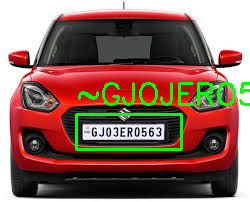

In [3]:
import cv2
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

def detect_number_plate(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Use Haar Cascade to detect plates
    # Ensure the haarcascade file exists at this path
    plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

    # Check if the cascade file was loaded successfully
    if plate_cascade.empty():
        print("Error: Could not load Haar cascade file.")
        return


    # Detect plates in the image
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Initialize EasyOCR reader
    reader = easyocr.Reader(['en'])

    # Loop through the detected plates
    for (x, y, w, h) in plates:
        # Draw rectangle around the plate
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the plate from the image
        # Ensure cropping coordinates are within image bounds
        plate_img = img[max(0,y):y+h, max(0,x):x+w]

        # Use EasyOCR to read the number plate
        result = reader.readtext(plate_img)

        # Loop through results and print detected text
        for detection in result:
            text = detection[1]
            print(f"Detected Number Plate: {text}")

            # Put the detected text on the image
            # Adjust text position if it goes out of bounds
            text_x = x
            text_y = y - 10
            if text_y < 0:
                text_y = y + h + 20 # Place text below the rectangle if too high


            cv2.putText(img, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the image using cv2_imshow
    cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow

    # Remove cv2.waitKey(0) and cv2.destroyAllWindows() as they are not needed with cv2_imshow

# Test the function
image_path = '/content/images.jpg'  # Change to the path of your image
detect_number_plate(image_path)